In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes = True)

# Plotting the composition of data

## Static composition

### Pie chart

In [2]:
p = sns.load_dataset('penguins')

In [3]:
c = p.groupby('species')['species'].count()

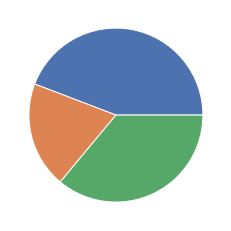

In [7]:
plt.pie(c);

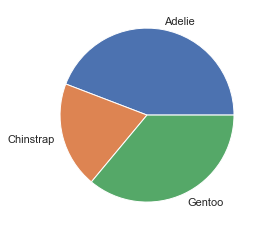

In [8]:
plt.pie(c, labels=c.index);

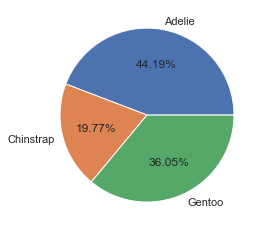

In [9]:
plt.pie(c, labels=c.index, autopct="%.2f%%");

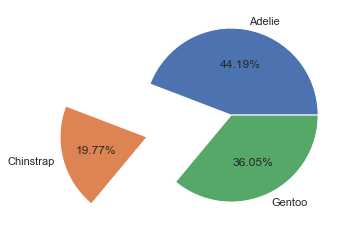

In [10]:
plt.pie(c, labels=c.index, autopct="%.2f%%", explode=[0,1,0]);

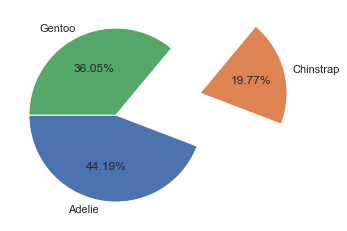

In [11]:
plt.pie(c, labels=c.index, autopct="%.2f%%", explode=[0,1,0], startangle=180);

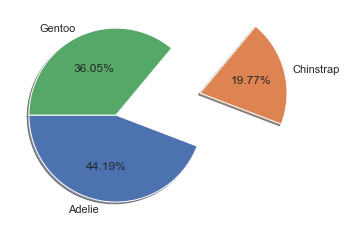

In [12]:
plt.pie(c, labels=c.index, autopct="%.2f%%", explode=[0,1,0], startangle=180, shadow=True);

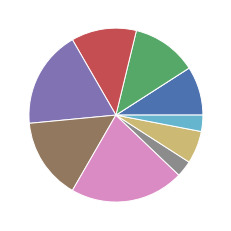

In [13]:
plt.pie(np.random.randint(0,10,10));

### Donut Plot

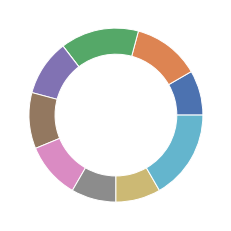

In [14]:
plt.pie(np.random.randint(0,10,10), wedgeprops=dict(width=0.3));

In [15]:
cmap =plt.get_cmap('Accent')
my_colours = cmap(np.arange(10))

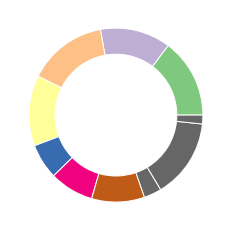

In [16]:
plt.pie(np.random.randint(0,10,10), wedgeprops=dict(width=0.3), colors=my_colours);


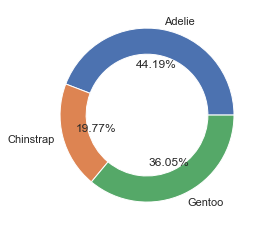

In [17]:
plt.pie(c, labels=c.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));

In [18]:
c_i = p.groupby('island')['island'].count()

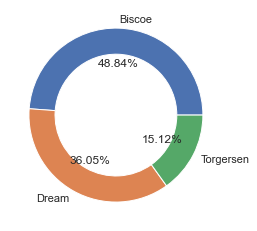

In [19]:
plt.pie(c_i, labels=c_i.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));

In [20]:
c = pd.crosstab(p.species, p.island)

In [21]:
c =c.T

In [22]:
c

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

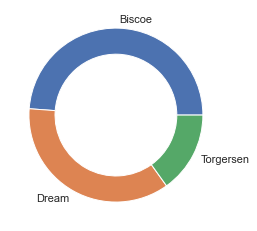

In [23]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3));

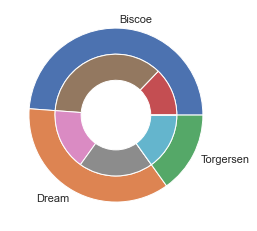

In [24]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3));
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3));

In [28]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))

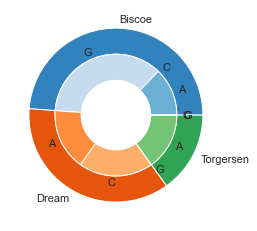

In [30]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3), colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3), colors=inner_colors, labels= ['A', 'C', 'G','A', 'C', 'G','A', 'C', 'G' ]);
#nested donut plot

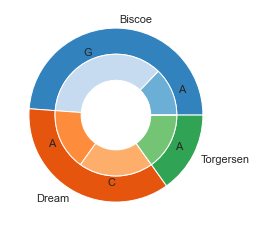

In [32]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3), colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3), colors=inner_colors, labels= ['A', '', 'G','A', 'C', '','A', '', '' ]);

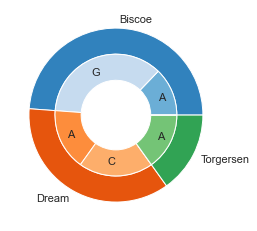

In [35]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3), colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3), colors=inner_colors, labels= ['A', '', 'G','A', 'C', '','A', '', '' ], 
labeldistance=0.75);

In [37]:
cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.array([0,4,8]))
inner_colors = cmap(np.array([1,2,3,5,6,7,9,10,11]))

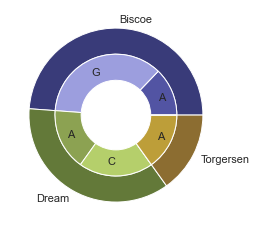

In [38]:
plt.pie(c.sum(axis=1), labels=c.index,radius=1, wedgeprops=dict(width=0.3), colors=outer_colors);
plt.pie(c.values.flatten(), radius=0.7, wedgeprops=dict(width=0.3), colors=inner_colors, labels= ['A', '', 'G','A', 'C', '','A', '', '' ], 
labeldistance=0.75);

### Stacked Bar Plot

In [28]:
import urllib.request
import json
url =  'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json');
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [50]:
df.head()

an ap ar as br ch ct       date     dateymd dd  ... sk     status tg tn tr  \
0  0  1  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Confirmed  1  1  0   
1  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Recovered  0  0  0   
2  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0   Deceased  0  0  0   
3  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Confirmed  2  0  0   
4  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Recovered  1  0  0   

   tt un  up ut wb  
0  81  0  12  0  0  
1   9  0   4  0  0  
2   2  0   0  0  0  
3  27  0   1  0  0  
4   4  0   0  0  0  

[5 rows x 42 columns]

In [5]:
df_ = df.tail(3) #last 3 days
df_.drop('date', axis=1, inplace=True)
df_.drop('dateymd', axis =1,inplace=True)
df_.set_index('status', inplace=True)
df_ =df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)

In [53]:
df_

status  Confirmed  Recovered  Deceased
an              7          8         0
ap            326        364         2
ar              0          0         0
as             66         87         2
br            622        523         3
ch             64         81         0
ct           1134       1607        17
dd              0          0         0
dl            703        850        28
dn              0          1         0
ga            112        116         1
gj            804        999         7
hp            214        552         4
hr            414        544        10
jh            230        203         5
jk            234        299         4
ka            662       1344         4
kl           5887       5029        24
la             25         12         1
ld              0          0         0
mh           3018       5572        68
ml              8         24         0
mn             36         43         5
mp            853       1122        10
mz              6         17         0
nl              6          6         0
or            263        383         4
pb            210        377        10
py             42         34         2
rj            626       1149         6
sk             19         13         0
tg            397        627         2
tn            957       1065        12
tr              2         10         0
un              0          0         0
up           1021       1369        18
ut            317        555         6
wb           1244       1587        30

In [54]:
df_.head()

status  Confirmed  Recovered  Deceased
an              7          8         0
ap            326        364         2
ar              0          0         0
as             66         87         2
br            622        523         3

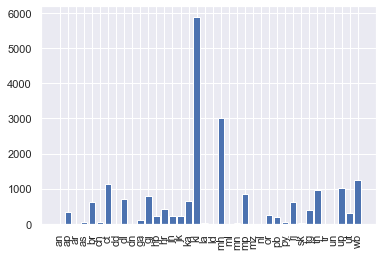

In [59]:
plt.bar(df_.index, df_.Confirmed);
plt.xticks(rotation=90);

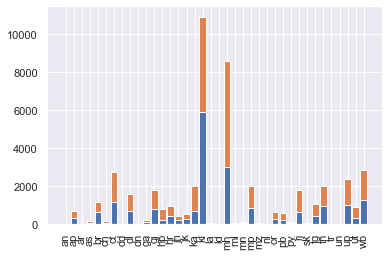

In [60]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.xticks(rotation=90);

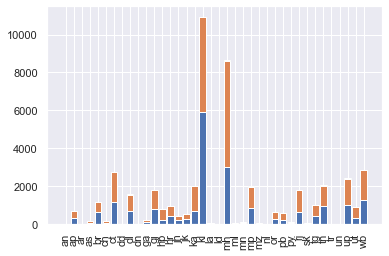

In [61]:
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered);
plt.xticks(rotation=90);

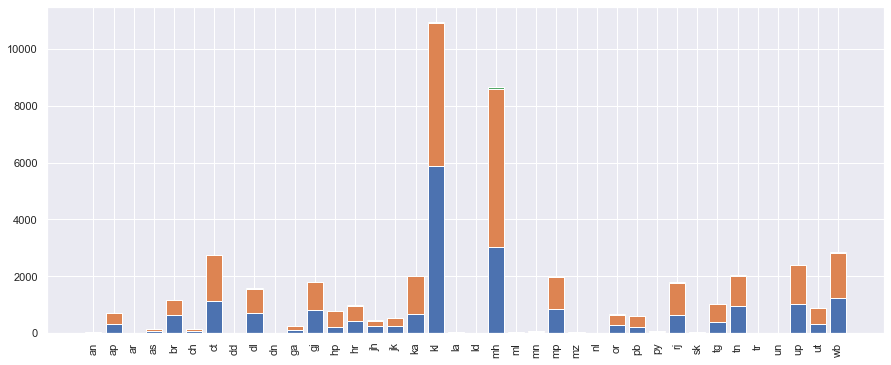

In [63]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed);
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed);
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered);
plt.xticks(rotation=90);

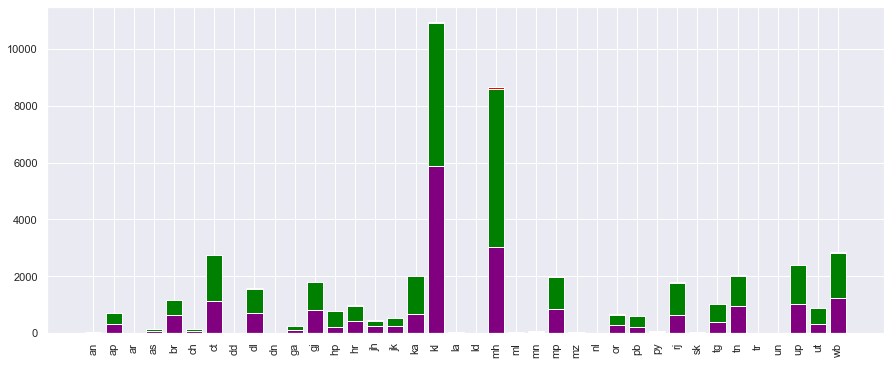

In [65]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color = 'Purple');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color = 'Red');
plt.xticks(rotation=90);

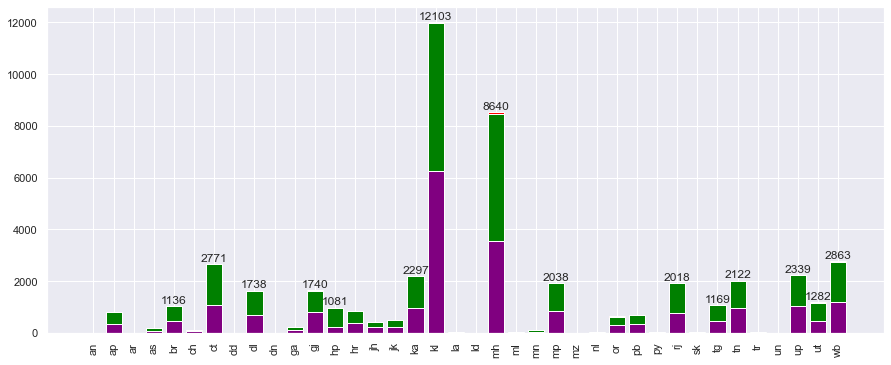

In [7]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color = 'Purple');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color = 'Red');
plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
    y = df_.loc[val].sum()+100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha = 'center')

### Relative Stacked Bar Plot

In [10]:
df_.head()

status  Confirmed  Recovered  Deceased
an              5          9         0
ap            349        472         4
ar              2         11         0
as             76        115         3
br            474        558         4

In [6]:
df_['Total'] = 0

In [7]:
df_['Total'] = df_.sum(axis=1)

In [13]:
df_.head()

status  Confirmed  Recovered  Deceased  Total
an              5          9         0     14
ap            349        472         4    825
ar              2         11         0     13
as             76        115         3    194
br            474        558         4   1036

In [14]:
df_['ConfirmedFraction'] = df_['Confirmed']/df_['Total']

In [15]:
df_.head()

status  Confirmed  Recovered  Deceased  Total  ConfirmedFraction
an              5          9         0     14           0.357143
ap            349        472         4    825           0.423030
ar              2         11         0     13           0.153846
as             76        115         3    194           0.391753
br            474        558         4   1036           0.457529

In [16]:
df_['RecoveredFraction'] = df_['Recovered']/df_['Total']
df_['DeceasedFraction'] = df_['Deceased']/df_['Total']

In [17]:
df_.head()

status  Confirmed  Recovered  Deceased  Total  ConfirmedFraction  \
an              5          9         0     14           0.357143   
ap            349        472         4    825           0.423030   
ar              2         11         0     13           0.153846   
as             76        115         3    194           0.391753   
br            474        558         4   1036           0.457529   

status  RecoveredFraction  DeceasedFraction  
an               0.642857          0.000000  
ap               0.572121          0.004848  
ar               0.846154          0.000000  
as               0.592784          0.015464  
br               0.538610          0.003861

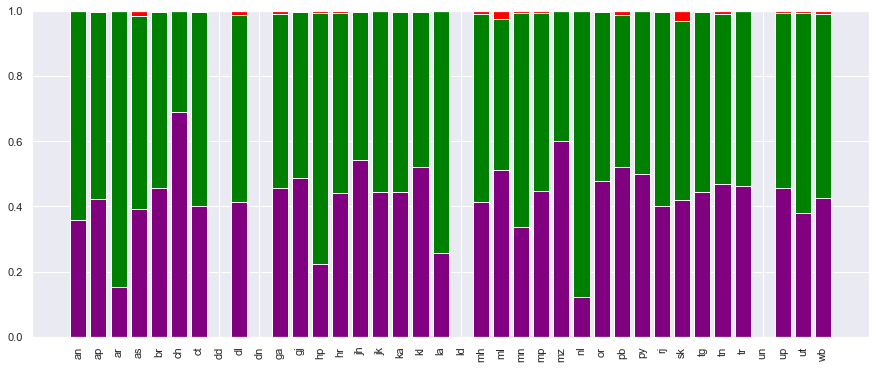

In [18]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.ConfirmedFraction, color = 'Purple');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction+df_.RecoveredFraction, color = 'Red');
plt.xticks(rotation=90);

In [19]:
df_ = df_.sort_values('ConfirmedFraction', ascending=False)

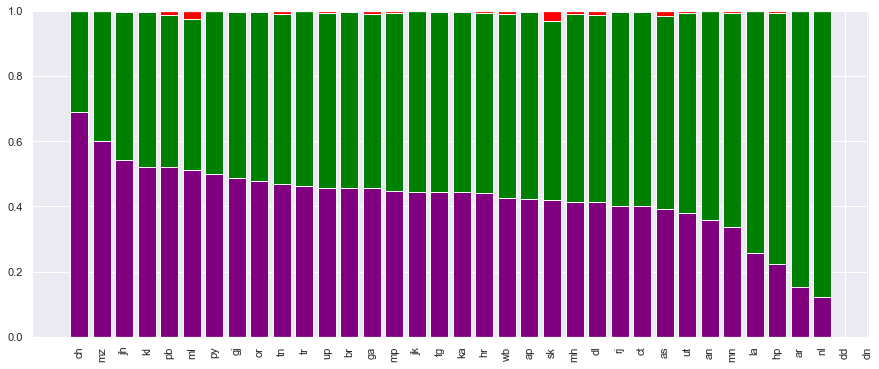

In [21]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.ConfirmedFraction, color = 'Purple');
plt.bar(df_.index, df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'Green');
plt.bar(df_.index, df_.DeceasedFraction, bottom=df_.ConfirmedFraction+df_.RecoveredFraction, color = 'Red');
plt.xticks(rotation=90);

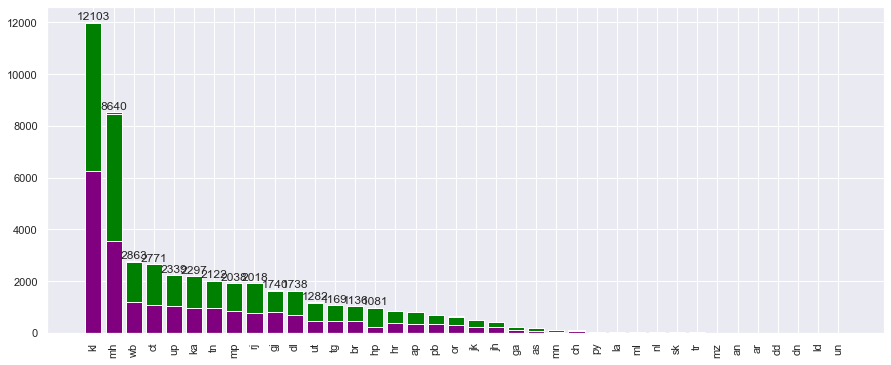

In [23]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color = 'Purple');
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color = 'Green');
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color = 'Red');
plt.xticks(rotation=90);


for i, val in enumerate(df_.index):
    y = df_.loc[val, 'Total'] + 100
    if y > 1000:
        x = i
        plt.text(x, y, str(y), ha = 'center')

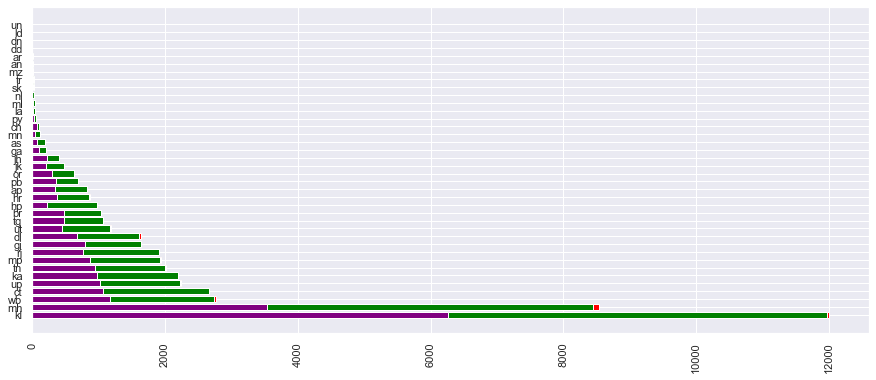

In [27]:
df_ = df_.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15,6);
plt.barh(df_.index, df_.Confirmed, color = 'Purple');
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color = 'Green');
plt.barh(df_.index, df_.Deceased, left = df_.Confirmed+df_.Recovered, color = 'Red');
plt.xticks(rotation=90);

 ## Time Varying Composition

In [32]:
df.head()

an ap ar as br ch ct       date     dateymd dd  ... sk     status tg tn tr  \
0  0  1  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Confirmed  1  1  0   
1  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0  Recovered  0  0  0   
2  0  0  0  0  0  0  0  14-Mar-20  2020-03-14  0  ...  0   Deceased  0  0  0   
3  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Confirmed  2  0  0   
4  0  0  0  0  0  0  0  15-Mar-20  2020-03-15  0  ...  0  Recovered  1  0  0   

   tt un  up ut wb  
0  81  0  12  0  0  
1   9  0   4  0  0  
2   2  0   0  0  0  
3  27  0   1  0  0  
4   4  0   0  0  0  

[5 rows x 42 columns]

In [6]:
df_ = df[['ka', 'date', 'status']]

In [7]:
df_.head()

ka       date     status
0  6  14-Mar-20  Confirmed
1  0  14-Mar-20  Recovered
2  1  14-Mar-20   Deceased
3  0  15-Mar-20  Confirmed
4  0  15-Mar-20  Recovered

In [8]:
 df_['ka'] = pd.to_numeric(df_['ka'])
 df_['date'] = pd.to_datetime(df_['date'])

In [9]:
df_.head()

ka       date     status
0   6 2020-03-14  Confirmed
1   0 2020-03-14  Recovered
2   1 2020-03-14   Deceased
3   0 2020-03-15  Confirmed
4   0 2020-03-15  Recovered

date        |  confirmed   | recovered | deceased


2020-03-14       6               0          1

2020-03-15       0               0          0

Pivot Table

In [10]:
df_ = df_.pivot_table(values='ka', columns="status", index='date')

In [11]:
df_.head()

status      Confirmed  Deceased  Recovered
date                                      
2020-03-14          6         1          0
2020-03-15          0         0          0
2020-03-16          1         0          0
2020-03-17          2         0          0
2020-03-18          5         0          0

### Stacked Area Plot

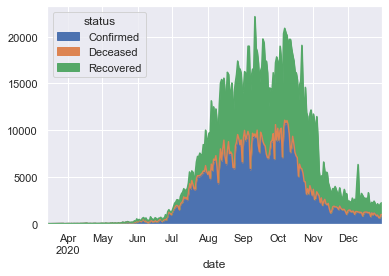

In [12]:
df_.plot.area();

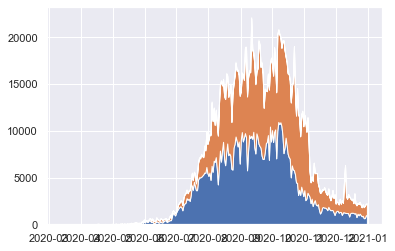

In [13]:
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased);

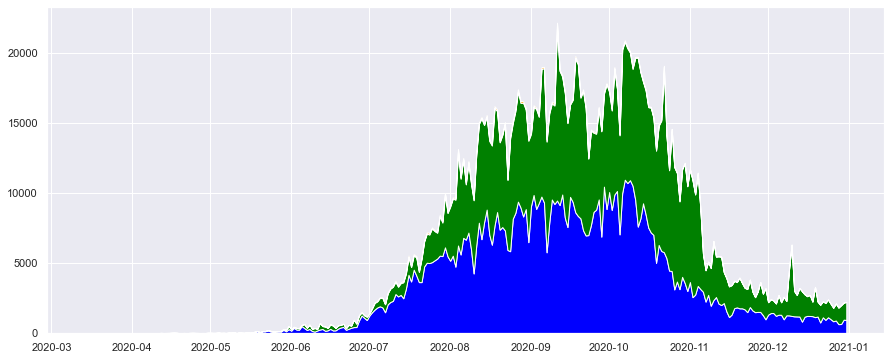

In [14]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased, colors=['Blue', "Green", 'Orange']);

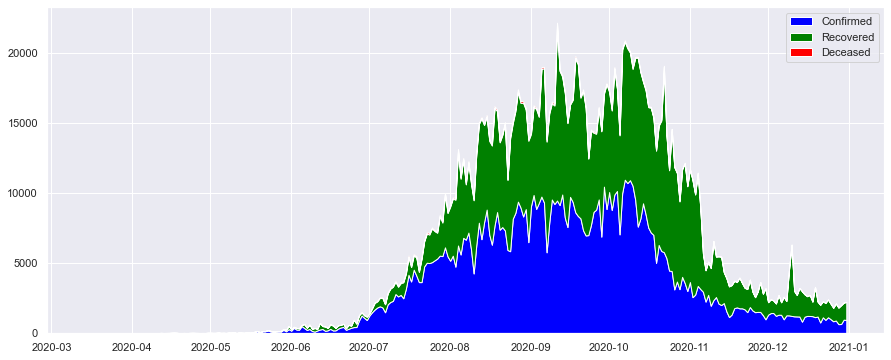

In [15]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased, colors=['Blue', "Green", 'Red'], labels=['Confirmed', 'Recovered', 'Deceased']);
plt.legend();

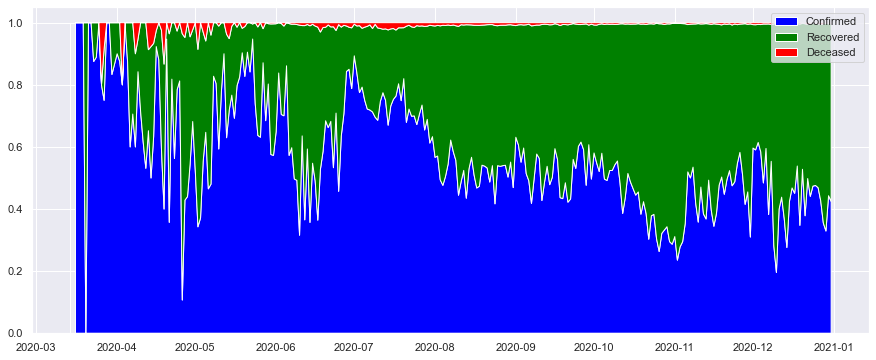

In [19]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1), colors=['Blue', "Green", 'Red'], labels=['Confirmed', 'Recovered', 'Deceased']);
plt.legend();

In [20]:
def plot_by_area(state):
     df_ = df[[state, 'date', 'status']]
     df_[state] = pd.to_numeric(df_[state])
     df_['date'] = pd.to_datetime(df_['date'])
     df_ = df_.pivot_table(values=state, columns="status", index='date')
     fig = plt.gcf();
     fig.set_size_inches(15,6);
     plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1), colors=['Blue', "Green", 'Red'], labels=['Confirmed', 'Recovered', 'Deceased']);
     plt.legend();

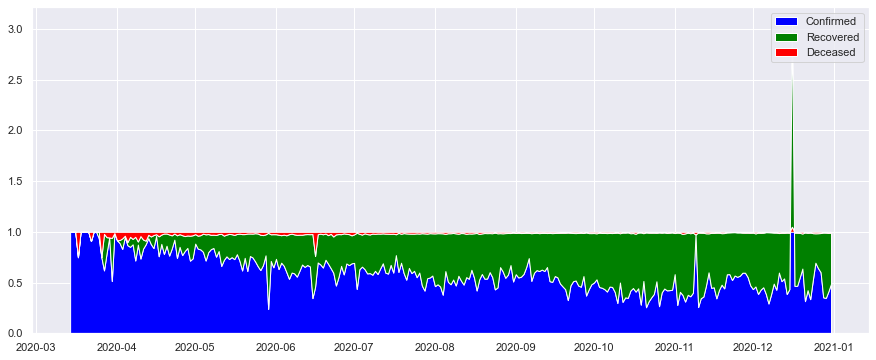

In [21]:
plot_by_area('mh')

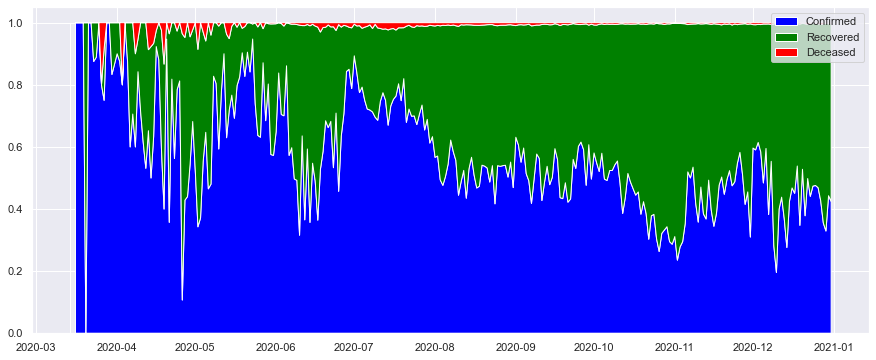

In [22]:
plot_by_area('ka')

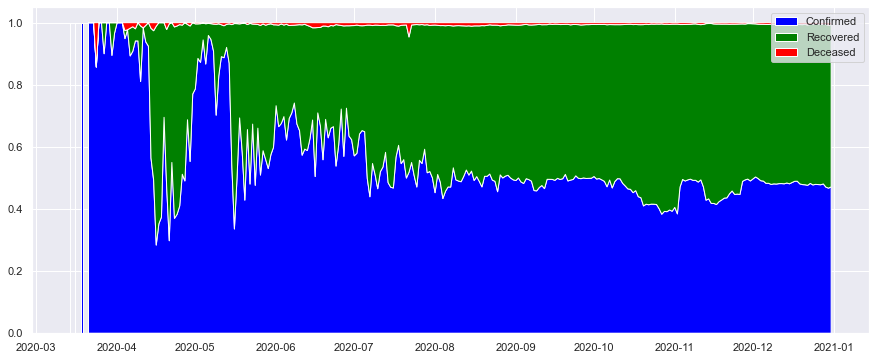

In [23]:
plot_by_area('tn')

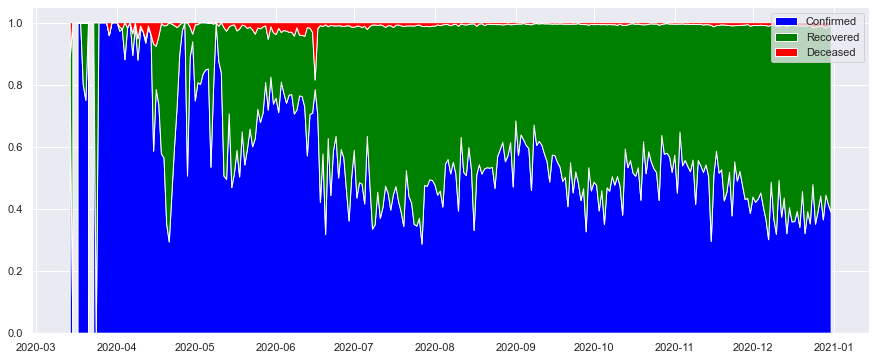

In [24]:
plot_by_area('dl')

## Plotting relationship between data

### Scatter plots

In [8]:
t = sns.load_dataset('tips')

In [31]:
t.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

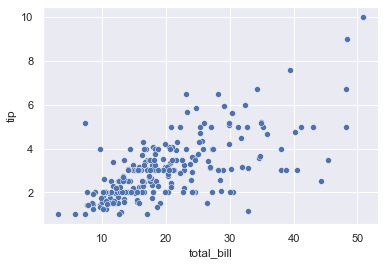

In [33]:
sns.scatterplot(x='total_bill', y='tip', data=t);

In [11]:
t['fraction_tip'] = t['tip']/t['total_bill']

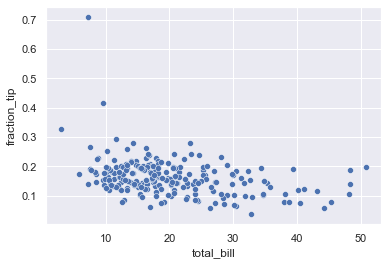

In [36]:
sns.scatterplot(x='total_bill', y='fraction_tip', data=t);

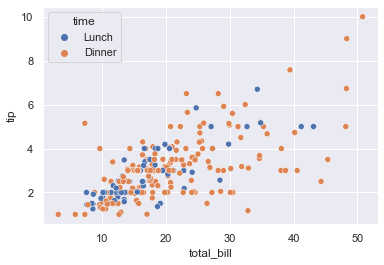

In [37]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time');

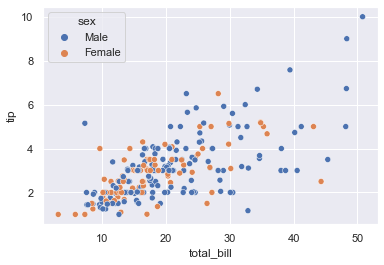

In [38]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='sex');

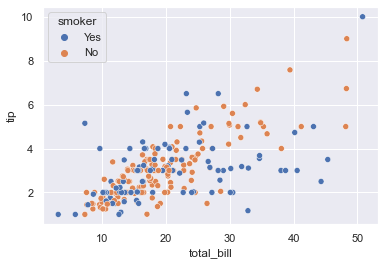

In [39]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='smoker');

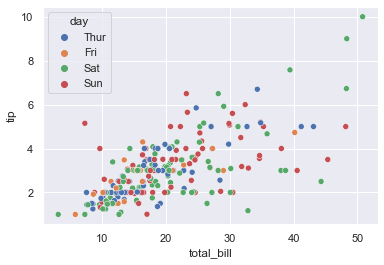

In [40]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='day');

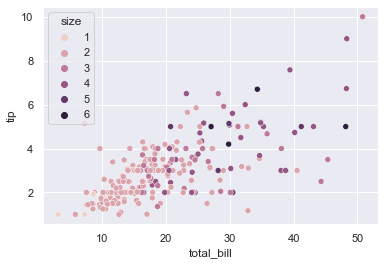

In [41]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='size');

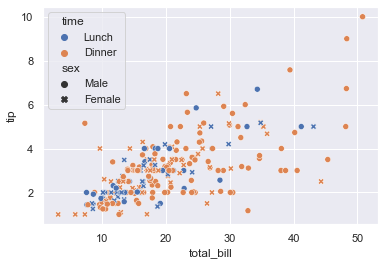

In [42]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex');

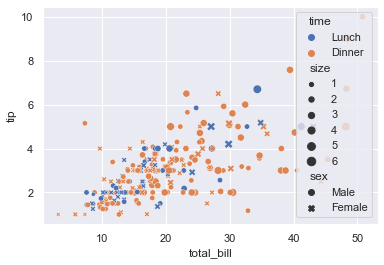

In [43]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex', size='size');

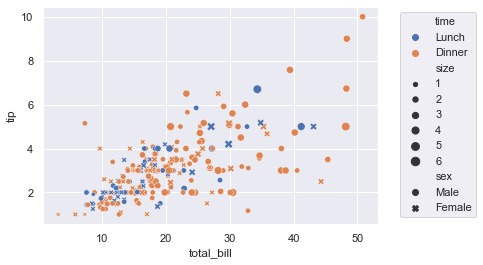

In [45]:
sns.scatterplot(x='total_bill', y='tip', data=t, hue='time', style='sex', size='size');
plt.legend(bbox_to_anchor=(1.05, 1));

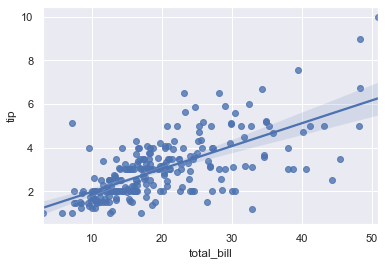

In [48]:
sns.regplot(x='total_bill', y='tip', data=t);
# shade is error that can happen

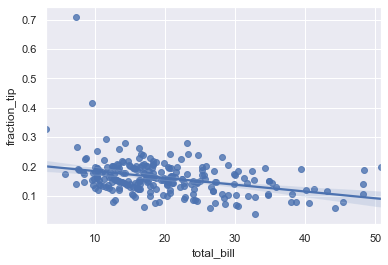

In [49]:
sns.regplot(x='total_bill', y='fraction_tip', data=t);

In [9]:
d = sns.load_dataset('diamonds')

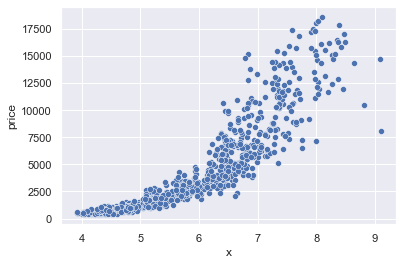

In [52]:
sns.scatterplot('x', 'price', data=d.sample(1000));

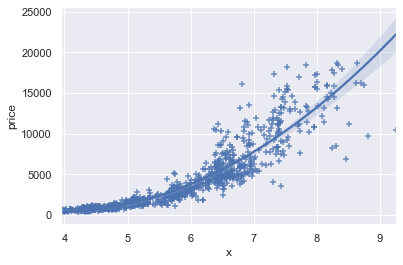

In [56]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker='+');

### Bar Plot

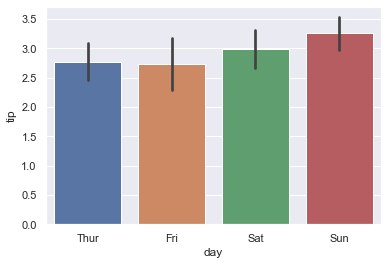

In [58]:
sns.barplot(x='day', y='tip', data=t);
#separates data based on day and then aggregates the value

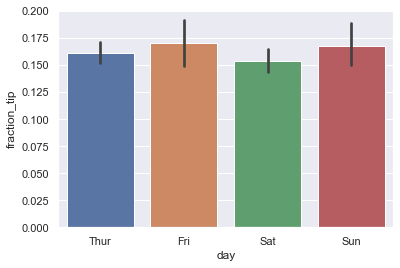

In [59]:
sns.barplot(x='day', y='fraction_tip', data=t);

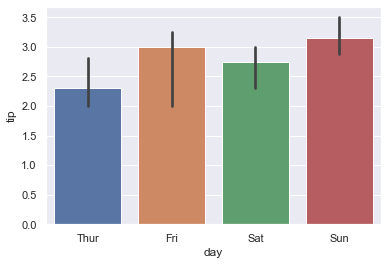

In [3]:
sns.barplot(x='day', y='tip', data=t, estimator=np.median);

In [13]:
 def my_estimate(v):
     return np.quantile(v,0.25)

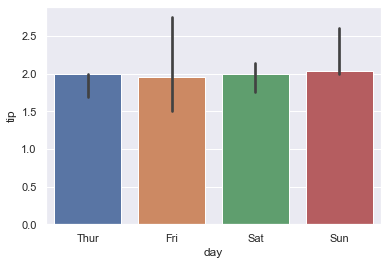

In [14]:
sns.barplot(x='day', y='tip', data=t, estimator= my_estimate);

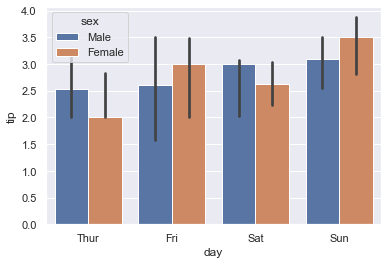

In [8]:
sns.barplot(x='day', y='tip', hue='sex', data=t, estimator=np.median);

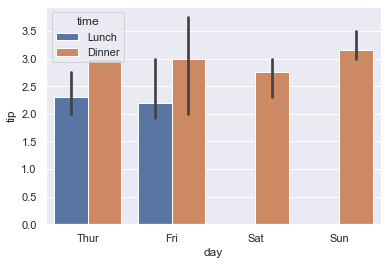

In [9]:
sns.barplot(x='day', y='tip', hue='time', data=t, estimator=np.median);

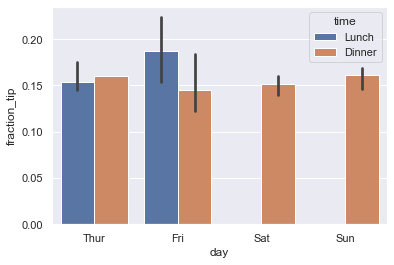

In [12]:
sns.barplot(x='day', y='fraction_tip', hue='time', data=t, estimator=np.median);

In [15]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

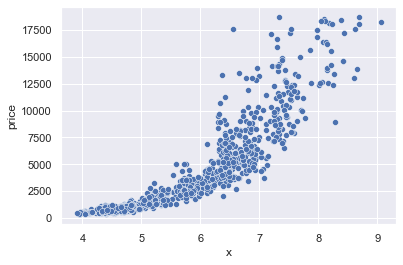

In [17]:
sns.scatterplot('x', 'price', data= d.sample(1000));

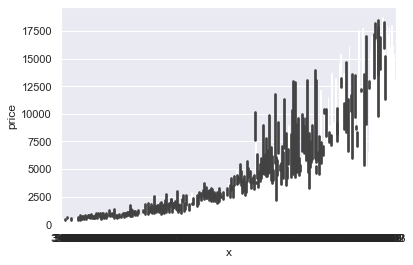

In [18]:
sns.barplot('x', 'price', data= d.sample(1000));

In [35]:
d['x_q'] = pd.cut(d['x'], bins=15);

In [36]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

              x_q  
0   (3.58, 4.296]  
1   (3.58, 4.296]  
2   (3.58, 4.296]  
3   (3.58, 4.296]  
4  (4.296, 5.012]

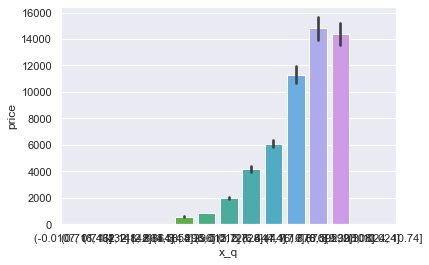

In [37]:
sns.barplot('x_q', 'price', data= d.sample(1000));

In [38]:
d['x_q'] = pd.cut(d['x'], bins=15, labels=False);

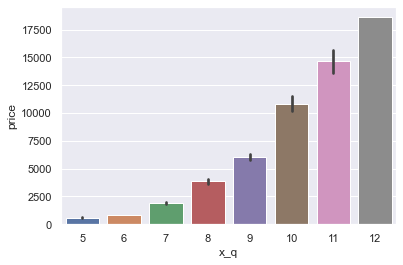

In [39]:
sns.barplot('x_q', 'price', data= d.sample(1000));

### Line plot

In [2]:
f = sns.load_dataset('fmri')

In [3]:
f.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

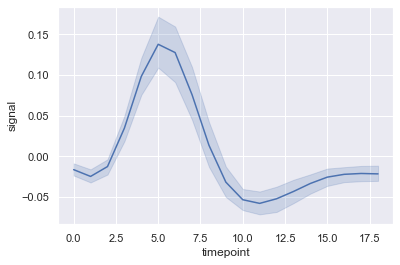

In [4]:
sns.lineplot(x='timepoint', y='signal', data=f);

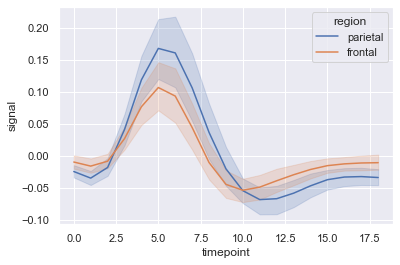

In [5]:
sns.lineplot(x='timepoint', y='signal', hue='region', data=f);

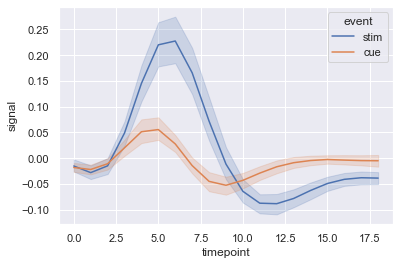

In [6]:
sns.lineplot(x='timepoint', y='signal', hue='event', data=f);

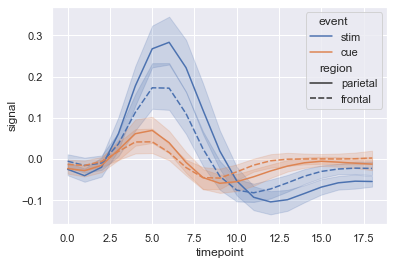

In [8]:
sns.lineplot(x='timepoint', y='signal', hue='event', data=f, style='region');

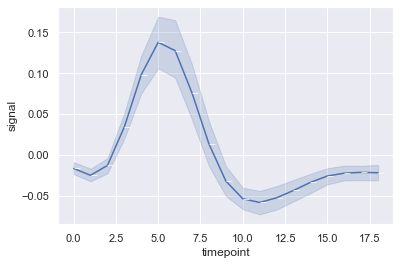

In [12]:
sns.lineplot(x='timepoint', y='signal', data=f, marker=True);

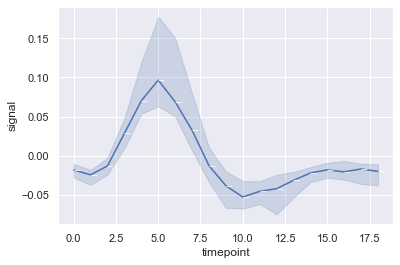

In [13]:
sns.lineplot(x='timepoint', y='signal', data=f, marker=True, estimator=np.median);

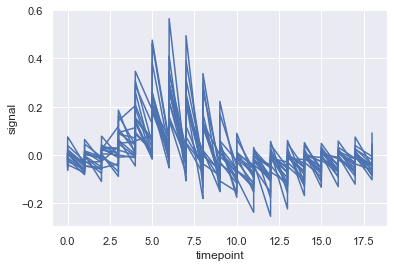

In [18]:
sns.lineplot(x='timepoint', y='signal', data=f, estimator=None, units='subject');

In [19]:
f_ = f[(f.region=='parietal') & (f.event=='cue')]

In [20]:
f_.head()

subject  timepoint event    region    signal
532      s3          4   cue  parietal  0.058219
533      s6          5   cue  parietal  0.038145
534      s7          5   cue  parietal -0.008158
535      s8          5   cue  parietal  0.047136
536      s9          5   cue  parietal  0.055847

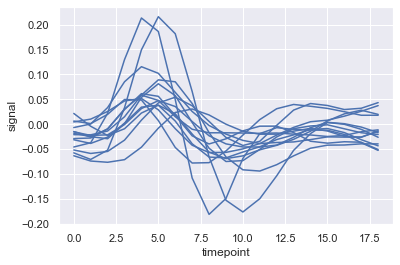

In [21]:
sns.lineplot(x='timepoint', y='signal', data=f_, estimator=None, units='subject');

In [22]:
x = np.array(np.random.randint(-10,10,10))

In [24]:
y = x*x

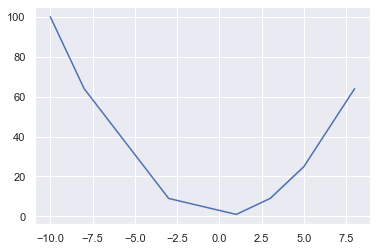

In [26]:
sns.lineplot(x,y);

In [45]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop('dateymd', axis=1, inplace=True)
df.drop('tt', axis=1, inplace=True)
df.set_index('date', inplace=True)
df = df[df['status']== 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace=True)

In [30]:
df.head()

date  an  ap  ar  as  br  ch  ct  dd  dl  ...  py  rj  sk  tg  tn  tr  \
0 2020-03-14   0   1   0   0   0   0   0   0   7  ...   0   3   0   1   1   0   
1 2020-03-15   0   0   0   0   0   0   0   0   0  ...   0   1   0   2   0   0   
2 2020-03-16   0   0   0   0   0   0   0   0   0  ...   1   0   0   1   0   0   
3 2020-03-17   0   0   0   0   0   0   0   0   1  ...   0   0   0   1   0   0   
4 2020-03-18   0   0   0   0   0   0   0   0   2  ...   0   3   0   8   1   0   

   un  up  ut  wb  
0   0  12   0   0  
1   0   1   0   0  
2   0   0   1   0  
3   0   2   0   1  
4   0   2   1   0  

[5 rows x 39 columns]

date | state   | confirmed

2020-03-14 | an | 0

2020-03-14 | ap | 1

In [46]:
df_ = pd.melt(df, id_vars='date', value_vars=list(df.columns).remove('date'), var_name='state', value_name='confirmed')

In [47]:
df_.head()

date state  confirmed
0 2020-03-14    an        NaN
1 2020-03-15    an        NaN
2 2020-03-16    an        NaN
3 2020-03-17    an        NaN
4 2020-03-18    an        NaN

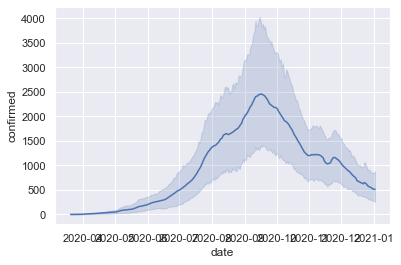

In [48]:
sns.lineplot('date', 'confirmed', data=df_);

In [36]:
states = ['mh','tn', 'ka', 'dl', 'kl']

In [37]:
df_ = df_[df_.state.isin(states)]

In [38]:
df_.head()

date state  confirmed
2360 2020-03-14    dl          7
2361 2020-03-15    dl          0
2362 2020-03-16    dl          0
2363 2020-03-17    dl          1
2364 2020-03-18    dl          2

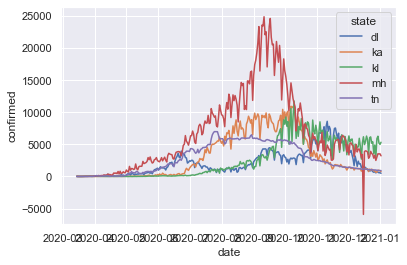

In [39]:
sns.lineplot('date', 'confirmed', hue='state', data=df_);

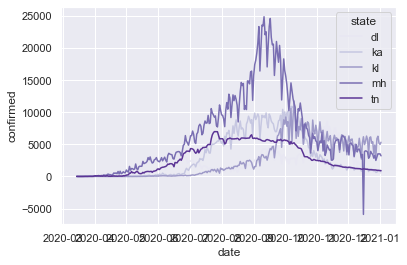

In [41]:
sns.lineplot('date', 'confirmed', hue='state', data=df_, palette="Purples");

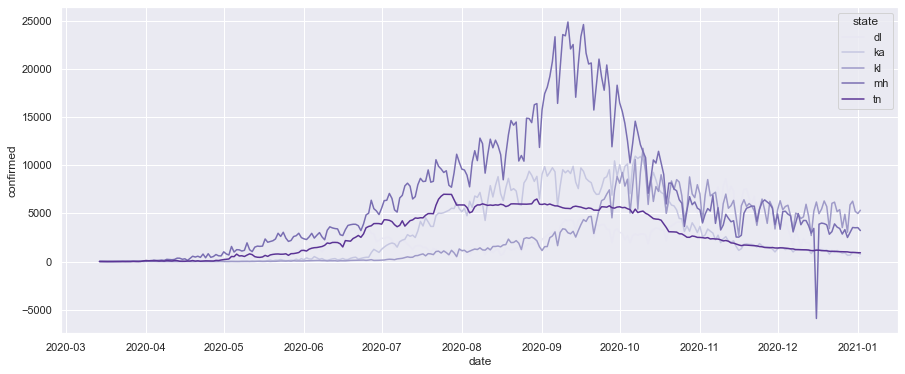

In [43]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.lineplot('date', 'confirmed', hue='state', data=df_, palette="Purples");

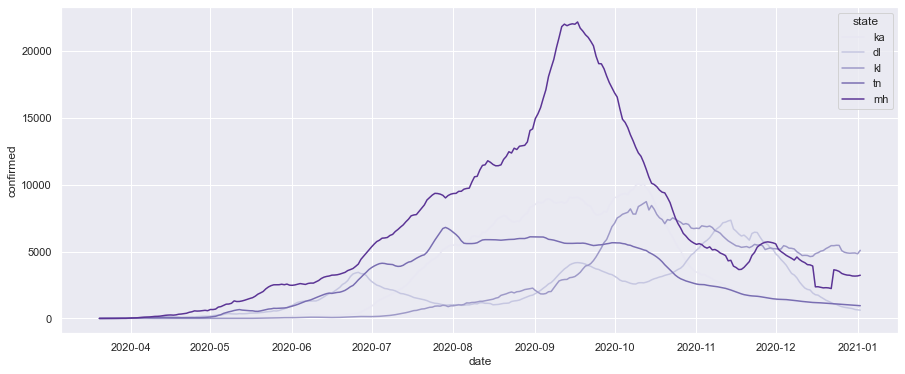

In [49]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.lineplot('date', 'confirmed', hue='state', data=df_, palette="Purples", hue_order=['ka', 'dl', 'kl', 'tn','mh' ]);

###  Heat Map

x [[ 10 x 10 ]]

x(i,j) -> some value

In [53]:
x = np.random.rand(10,10)

<AxesSubplot:>

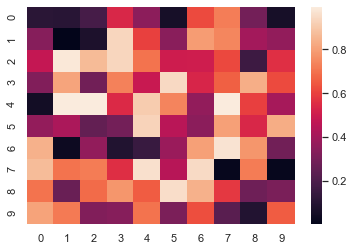

In [55]:
sns.heatmap(x)

In [56]:
fl = sns.load_dataset('flights')

In [57]:
fl.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [58]:
fl.sample(10)

year month  passengers
86   1956   Mar         317
26   1951   Mar         178
104  1957   Sep         404
2    1949   Mar         132
20   1950   Sep         158
116  1958   Sep         404
3    1949   Apr         129
79   1955   Aug         347
24   1951   Jan         145
30   1951   Jul         199

year	Jan     Feb    March 

1949	112     118     132

1950

1951

In [59]:
fl_= fl.pivot(index='year', columns='month', values='passengers')

In [60]:
fl_.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201

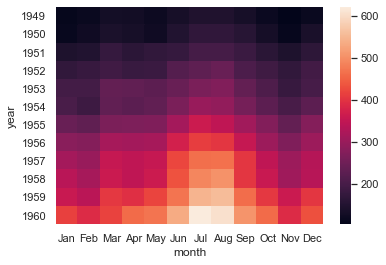

In [62]:
sns.heatmap(fl_);

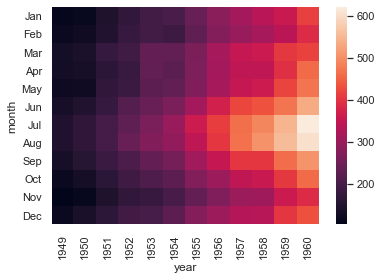

In [63]:
sns.heatmap(fl_.T);

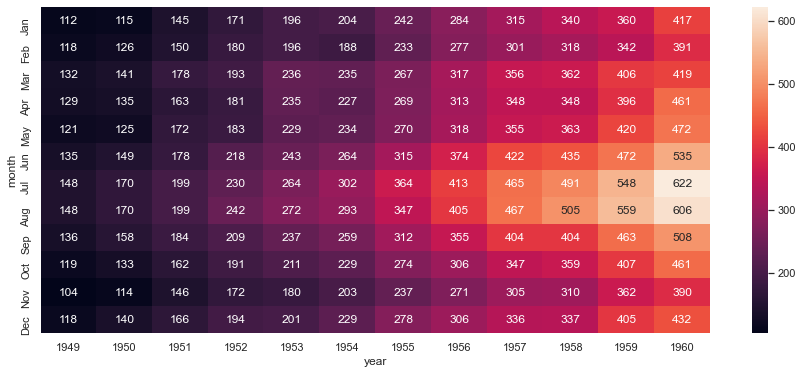

In [65]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d');

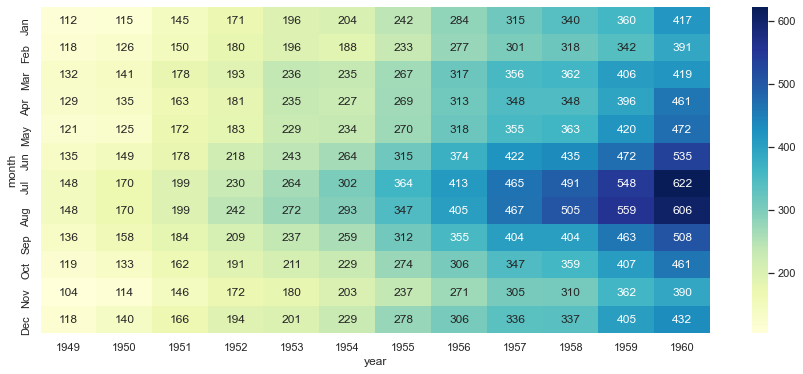

In [66]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d', cmap="YlGnBu");

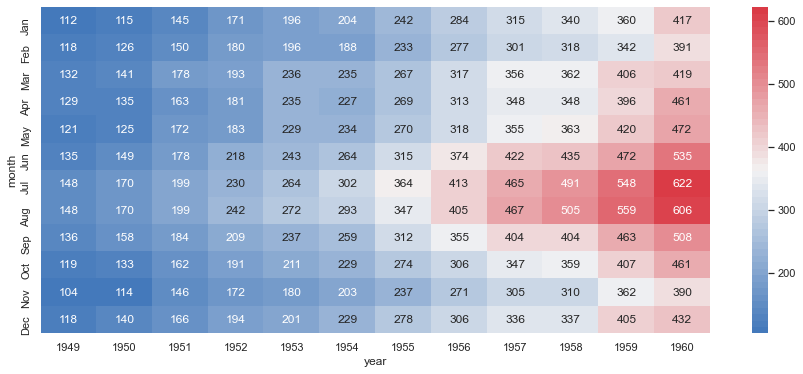

In [68]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=50));

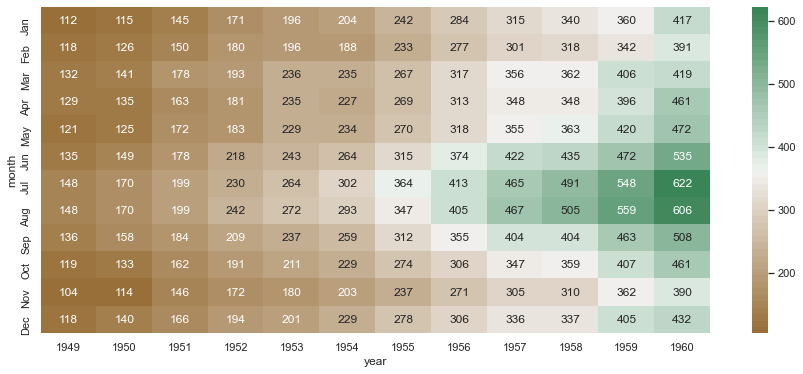

In [69]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(50, 500, n=50));

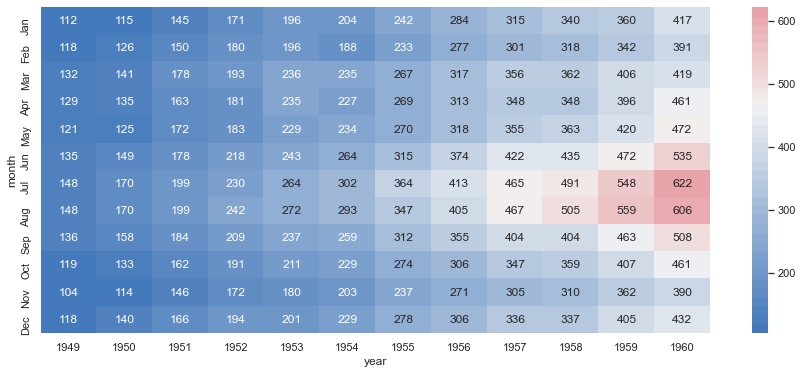

In [74]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=50), center=fl_.loc[1957,'Jul']);

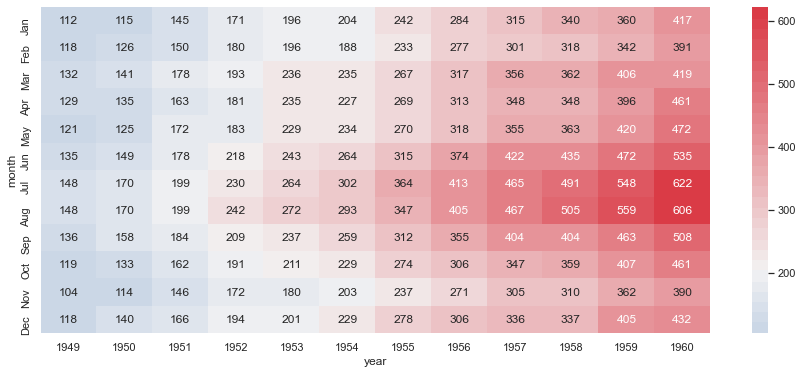

In [75]:
fig = plt.gcf();
fig.set_size_inches(15,6);
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(250, 10, n=50), center=fl_.loc[1954,'Jan']);

# Task on open ended visualization